<span style="font-size: 26px;"><b> «HR-аналитика 2.0: прогнозирование удовлетворенности и оттока персонала»</b></span> 

В современных условиях эффективное управление персоналом является ключевым фактором успеха любой организации. Особенно важным становится прогнозирование удовлетворенности сотрудников и предотвращение их увольнения, поскольку это напрямую влияет на стабильность и развитие бизнеса.

<span style="font-size: 16px;"><b> Цель работы:</b></span> разработка системы прогнозирования удовлетворенности сотрудников и предсказания их увольнения с использованием методов машинного обучения для оптимизации HR-процессов компании «Работа с заботой».

<span style="font-size: 24px;"><b> План работы:</b></span> 

<span style="font-size: 22px;"><b>1. Прогнозирование удовлетворенности</b></span> 

<span style="font-size: 18px;"><b>1.1 Подготовительный этап</b></span> 
  * Загрузка и проверка данных, изучение структуры (проверка форматов, анализ описаний)
  * Предобработка данных
    
<span style="font-size: 18px;"><b>1.2 Исследовательский анализ</b></span> 
  * Анализ типов данных 
  * Выявление выбросов

<span style="font-size: 18px;"><b>1.3 Корреляционный анализ</b></span> 
  * Выявление мультиколлинеарности
  * Принятие мер по устранению сильно коррелирующих признаков

<span style="font-size: 18px;"><b>1.4 Моделирование</b></span> 
  * Создание пайплайнов - использование ColumnTransformer, раздельная обработка количественных и категориальных признаков, применение различных кодировщиков и скейлеров;
  * Обучение моделей - LinearRegression, DecisionTreeRegressor
  * Подбор гиперпараметров - использование SMAPE (успех при <=15), как метрики оценки, настройка параметров моделей, определение лучшей модели.


<span style="font-size: 18px;"><b>1.5 Вывод к задаче I</b></span> 
  * Описание проведенного анализа
  * Результаты моделирования


<span style="font-size: 22px;"><b>2. Предсказание увольнения сотрудника из компании</b></span> 

<span style="font-size: 18px;"><b>2.1 Подготовительный этап</b></span> 
  * Загрузка и проверка данных, изучение структуры (проверка форматов, анализ описаний)
  * Предобработка данных
    
<span style="font-size: 18px;"><b>2.2 Исследовательский анализ</b></span> 
<span style="font-size: 16px;"><b>2.2.1 Анализ данных</b></span> 
  * Анализ типов данных 
  * Выявление выбросов

<span style="font-size: 16px;"><b>2.2.2 Портрет «уволившегося сотрудника»</b></span> 
  * Анализ отделов
  * Анализ загруженности
  * Анализ зарплат
  * Сравнительный анализ
 
<span style="font-size: 16px;"><b>2.2.3 Анализ влияния удовлетворенности работой</b></span> 
  * Визуализация данных
  * Статистический анализ
  * Сравнительный анализ
    
<span style="font-size: 18px;"><b>2.3 Корреляционный анализ</b></span> 
  * Выявление мультиколлинеарности
  * Принятие мер по устранению сильно коррелирующих признаков

<span style="font-size: 18px;"><b>2.4 Моделирование</b></span> 
  * Интеграция нового признака
  * Создание пайплайнов - использование ColumnTransformer, раздельная обработка количественных и категориальных признаков, применение различных кодировщиков и скейлеров;
  * Обучение моделей - KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVC;
  * Подбор гиперпараметров - использование ROC-AUC как метрики оценки, настройка параметров моделей, определение лучшей модели.

<span style="font-size: 18px;"><b>2.5 Вывод к задаче II</b></span> 
  * Описание проведенного анализа
  * Результаты моделирования
  

<span style="font-size: 22px;"><b>3.  Общий вывод</b></span> 


Для проведения исследования нам предоставлены 5 датасетов:
1. <span style="font-size: 16px;"><b>train_job_satisfaction_rate.csv </b></span> с тренировочными данными о работниках к I задаче; 
2. <span style="font-size: 16px;"><b>test_features.csv </b></span> с тестовой выборкой по работикам;
3. <span style="font-size: 16px;"><b>test_target_job_satisfaction_rate.csv </b></span> с целевым признаком тестовой выборкик I задаче;
4. <span style="font-size: 16px;"><b>train_quit.csv </b></span> с тренировочными данными о работниках ко II задаче;
5. <span style="font-size: 16px;"><b>train_target_quit.csv </b></span> с целевым признаком тестовой выборки ко II задаче.

<span style="font-size: 16px;"><b> Установка библиотек: </b></span> 

In [49]:
!pip install phik

In [50]:
pip install -U shap

Note: you may need to restart the kernel to use updated packages.


In [51]:
!pip install matplotlib==3.5.0

In [52]:
pip install scikit-learn==1.3.1

Note: you may need to restart the kernel to use updated packages.


<span style="font-size: 16px;"><b> Импорт библиотек: </b></span> 

In [53]:
# Математические библиотеки
import numpy as np
import pandas as pd
from scipy import stats as st

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Корреляция
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# Машинное обучение
from sklearn.model_selection import train_test_split

# Класс pipeline
from sklearn.pipeline import Pipeline

# Модели
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC 
from sklearn.dummy import DummyClassifier

# Подготовка данных
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler, 
    MinMaxScaler, 
)

# работа с пропусками
from sklearn.impute import SimpleImputer

# пайплайны
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# автоматизированный поиск гипперпараметров
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Метрики
from sklearn.metrics import (
    make_scorer,
    roc_auc_score,
    r2_score
)

# Ошибки
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Настройки отображения
pd.set_option('display.max_columns', None)

<span style="font-size: 16px;"><b> Глобальные переменные: </b></span> 

In [54]:
RANDOM_STATE = 42
TEST_SIZE = 0.25


## Прогнозирование удовлетворенности

### Подготовительный этап 

In [55]:
train_job_I = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',')
test_features_I = pd.read_csv('/datasets/test_features.csv', sep=',')
test_target_job_I= pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',')

In [56]:
train_job_I.info()
train_job_I.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [57]:
test_features_I.info()
test_features_I.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [58]:
test_target_job_I.info()
test_target_job_I.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Всего загружено 3 датасета, содеражих: 4000 строк тренировочных данных о работниках; 2000 строк тестовых данных о работниках; 2000 строк данных целевого параметра. в датафреймах корректные названия колонок, в столбцах 'dept' и 'level' есть пропуски, которые обработаются дальше в пайплайне. 

Сделаем 'id' индексом датасета.

In [59]:
train_job_I.set_index('id', inplace=True)

<span style="font-size: 14px;"><b> Проверим на наличие неявных дубликатов </b></span> 

In [60]:
list_df_cat = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'employment_years', 'supervisor_evaluation']

print('\033[1mtrain_job_I\033[0m')  
for col in list_df_cat:
    print(col, ':', train_job_I[col].unique())    
print('\n')     

print('\033[1mtest_features_I\033[0m')  
for col in list_df_cat:
    print(col, ':', test_features_I[col].unique())
  

train_job_I
dept : ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level : ['junior' 'middle' 'sinior' nan]
workload : ['medium' 'high' 'low']
last_year_promo : ['no' 'yes']
last_year_violations : ['no' 'yes']
employment_years : [ 2  1  4  7  9  6  3 10  8  5]
supervisor_evaluation : [1 5 2 3 4]


test_features_I
dept : ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level : ['junior' 'middle' 'sinior' nan]
workload : ['medium' 'low' 'high' ' ']
last_year_promo : ['no' 'yes']
last_year_violations : ['no' 'yes']
employment_years : [ 2  1  5  6  3  9  7  4  8 10]
supervisor_evaluation : [5 4 3 1 2]


Неявные дубликаты отсутствуют

<span style="font-size: 14px;"><b> Проверим на наличие явных дубликатов в train_job_I</b></span> 

In [61]:
print('дубликаты train_job_I -', train_job_I.duplicated().sum())

дубликаты train_job_I - 245


Удалим строки с полностью дублирующимися параметрами

In [62]:
train_job_I = train_job_I.drop_duplicates()
train_job_I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3749 non-null   object 
 1   level                  3751 non-null   object 
 2   workload               3755 non-null   object 
 3   employment_years       3755 non-null   int64  
 4   last_year_promo        3755 non-null   object 
 5   last_year_violations   3755 non-null   object 
 6   supervisor_evaluation  3755 non-null   int64  
 7   salary                 3755 non-null   int64  
 8   job_satisfaction_rate  3755 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 293.4+ KB


Данные подготовлены для исследовательского анализа данных. Явных и неявных дубликатов не выявлено. Тип данных признаков корректны.

### Исследовательский анализ данных

<span style="font-size: 14px;"><b>Построим графики распределения свойств для категориальных и количественных (непрервыных и дискретнных) признаков по датасетам.</b></span> 

In [63]:
categories_list = (
    ['dept', 
    'level',
    'workload',
    'last_year_promo', 
    'last_year_violations']
)
categories_name_list = (
    ['Отдел', 
    'Уровень должности',
    'Уровень загруженности',
    'Повышение за год', 
    'Нарушение трудового договора за год']
)
discret_list = ['employment_years', 'supervisor_evaluation']
discret_name_list = ['Длительность работы', 'Оценка качества работы']
numeric_list =  ['salary', 'job_satisfaction_rate']
numeric_name_list =  ['Зарплата', 'Уровень удовлетворенности']

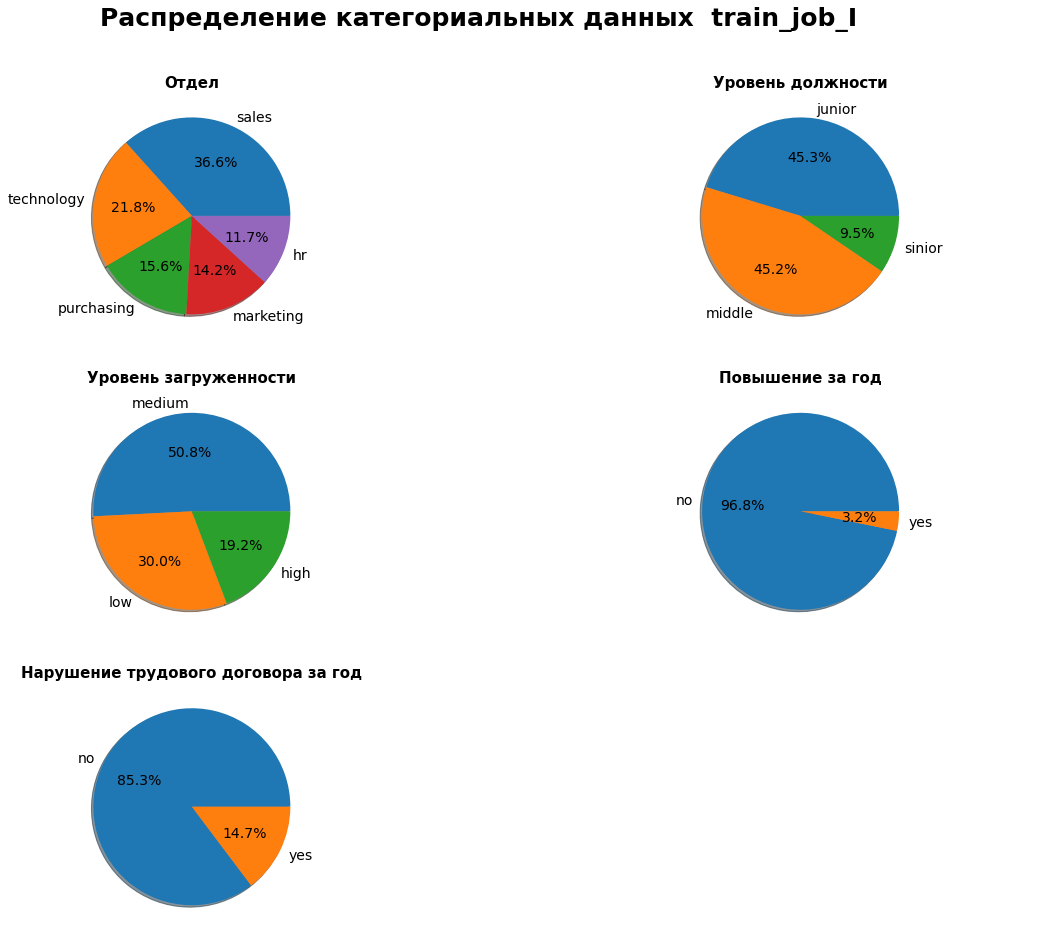

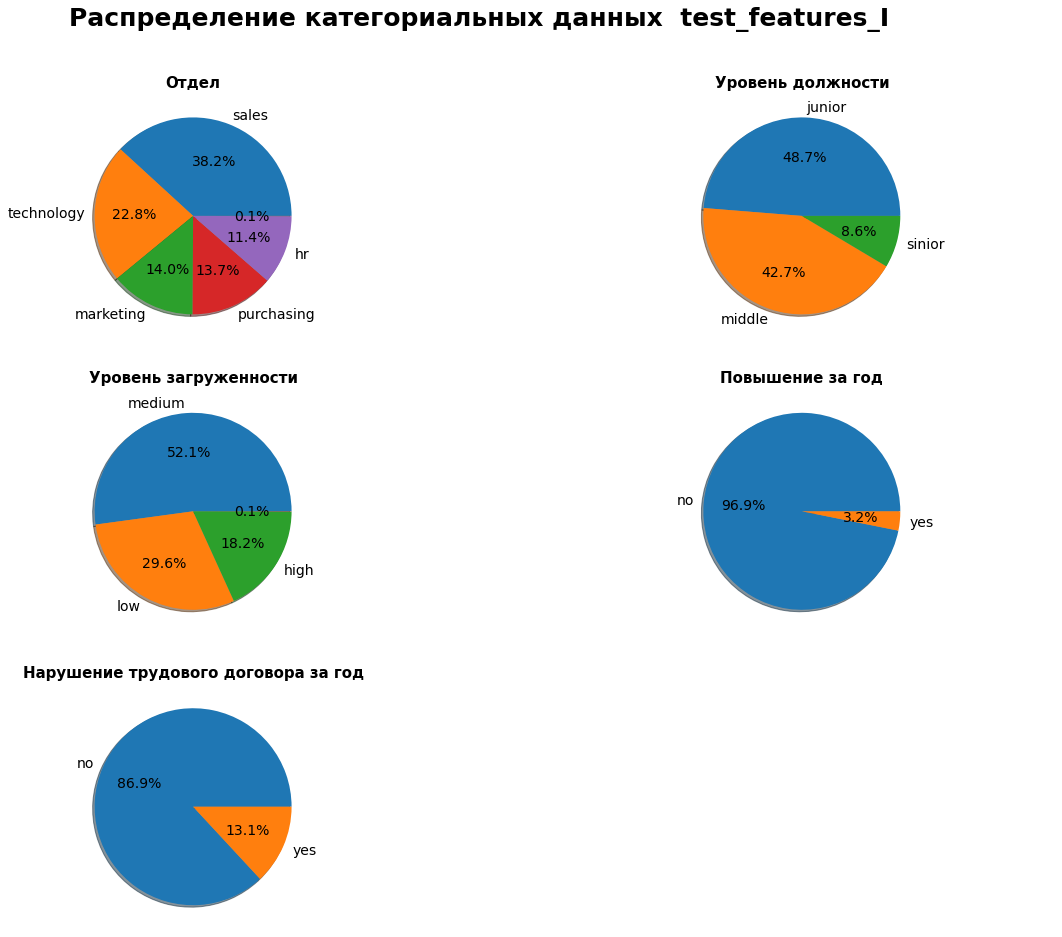

In [64]:
fig, axs = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Распределение категориальных данных  train_job_I', fontsize=25, weight='bold')
k = 0
m = 0
n = 0
for cat in categories_list:
    train_job_I[cat].value_counts().plot.pie(
        autopct='%1.1f%%',
        shadow=True,
        fontsize=14,                              
        legend=False,
        ylabel='',
        ax=axs[m, k]
    );
    
    axs[m, k].set_title(categories_name_list[n], fontsize=15, weight='bold')
    if k == 1:
        m += 1
        k = 0
        n += 1 
    else:
        k += 1
        n += 1
axs[2, 1].axis('off') 
plt.subplots_adjust(top=0.9) 


fig, axs = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Распределение категориальных данных  test_features_I', fontsize=25, weight='bold')
k = 0
m = 0
n = 0
for cat in categories_list:
    test_features_I[cat].value_counts().plot.pie(
        autopct='%1.1f%%',
        shadow=True,
        fontsize=14,                              
        legend=False,
        ylabel='',
        ax=axs[m, k]
    );
    
    axs[m, k].set_title(categories_name_list[n], fontsize=15, weight='bold')
    if k == 1:
        m += 1
        k = 0
        n += 1 
    else:
        k += 1
        n += 1
axs[2, 1].axis('off') 
plt.subplots_adjust(top=0.9) 


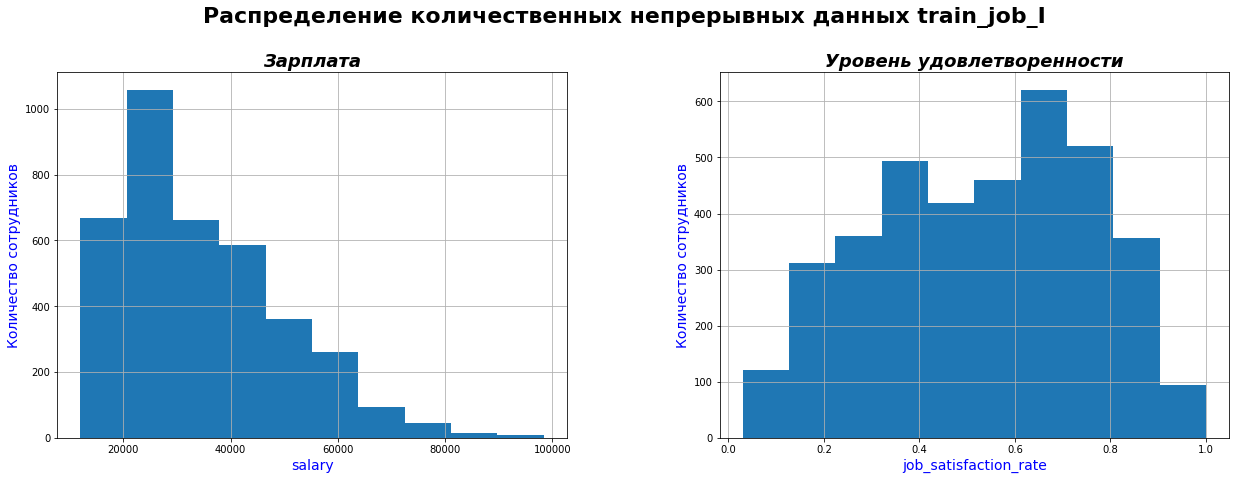

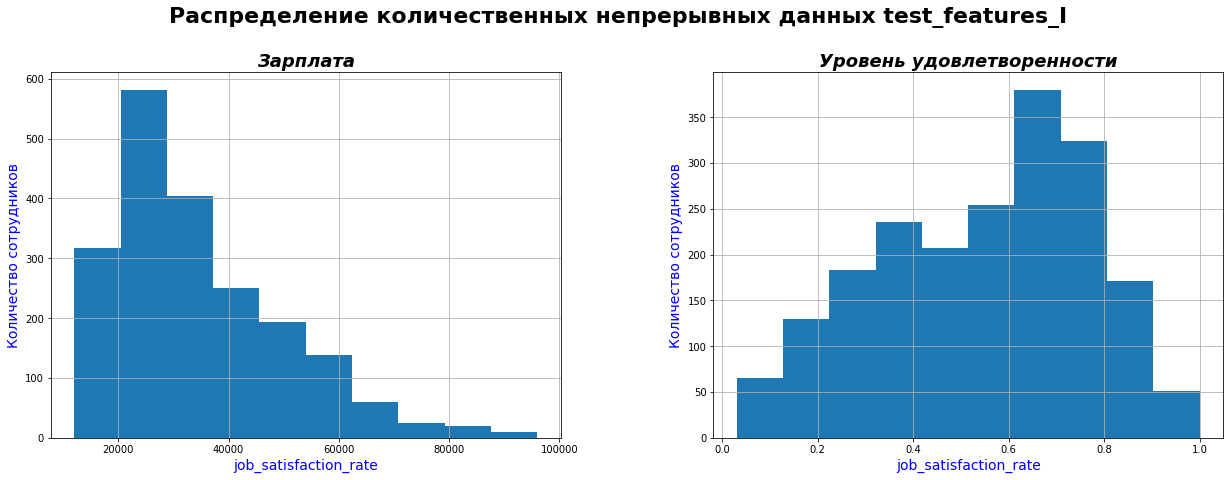

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Распределение количественных непрерывных данных train_job_I', fontsize=22, weight='bold')
k = 0
for cat in numeric_list:
    train_job_I[cat].hist(ax=axs[k])
    axs[k].set_xlabel(cat, fontsize=14, color='blue')
    axs[k].set_ylabel('Количество сотрудников', fontsize=14, color='blue')
    axs[k].set_title(numeric_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.5) 


fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Распределение количественных непрерывных данных test_features_I', fontsize=22, weight='bold')
k = 0

test_features_I[numeric_list[0]].hist(ax=axs[0])
axs[0].set_xlabel(cat, fontsize=14, color='blue')
axs[0].set_ylabel('Количество сотрудников', fontsize=14, color='blue')
axs[0].set_title(numeric_name_list[0], fontsize=18, weight='bold',style='italic')

test_target_job_I[numeric_list[1]].hist(ax=axs[1])
axs[1].set_xlabel(cat, fontsize=14, color='blue')
axs[1].set_ylabel('Количество сотрудников', fontsize=14, color='blue')
axs[1].set_title(numeric_name_list[1], fontsize=18, weight='bold',style='italic')

plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.5) 

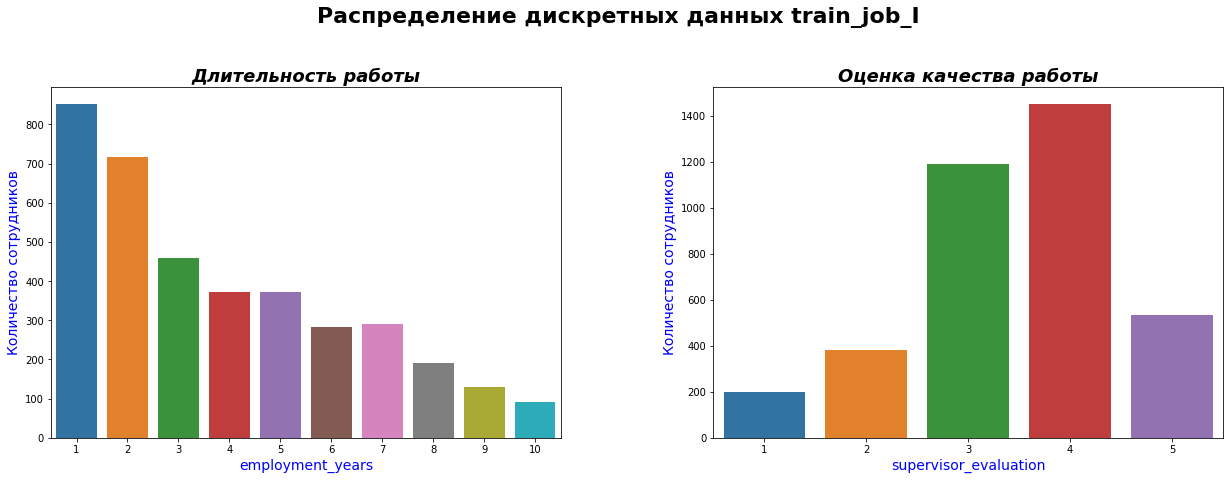

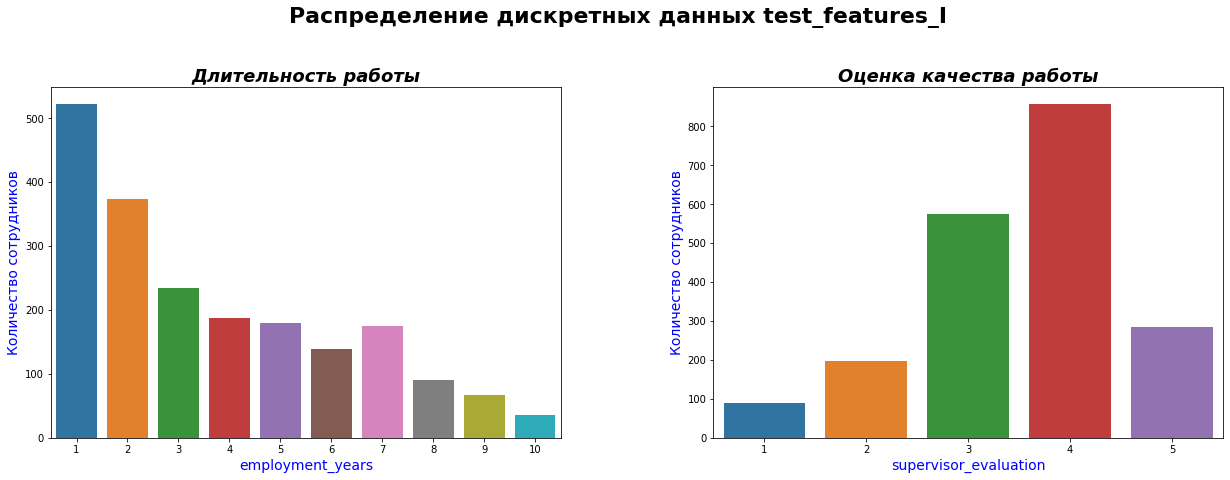

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Распределение дискретных данных train_job_I', fontsize=22, weight='bold')
k = 0
for cat in discret_list:
    sns.countplot(x=cat, data=train_job_I, ax=axs[k])
    axs[k].set_xlabel(cat, fontsize=14, color='blue')
    axs[k].set_ylabel('Количество сотрудников', fontsize=14, color='blue')
    axs[k].set_title(discret_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.82, wspace=0.3, hspace=0.5) 


fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Распределение дискретных данных test_features_I', fontsize=22, weight='bold')
k = 0
for cat in discret_list:
    sns.countplot(x=cat, data=test_features_I, ax=axs[k])
    axs[k].set_xlabel(cat, fontsize=14, color='blue')
    axs[k].set_ylabel('Количество сотрудников', fontsize=14, color='blue')
    axs[k].set_title(discret_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.82, wspace=0.3, hspace=0.5) 

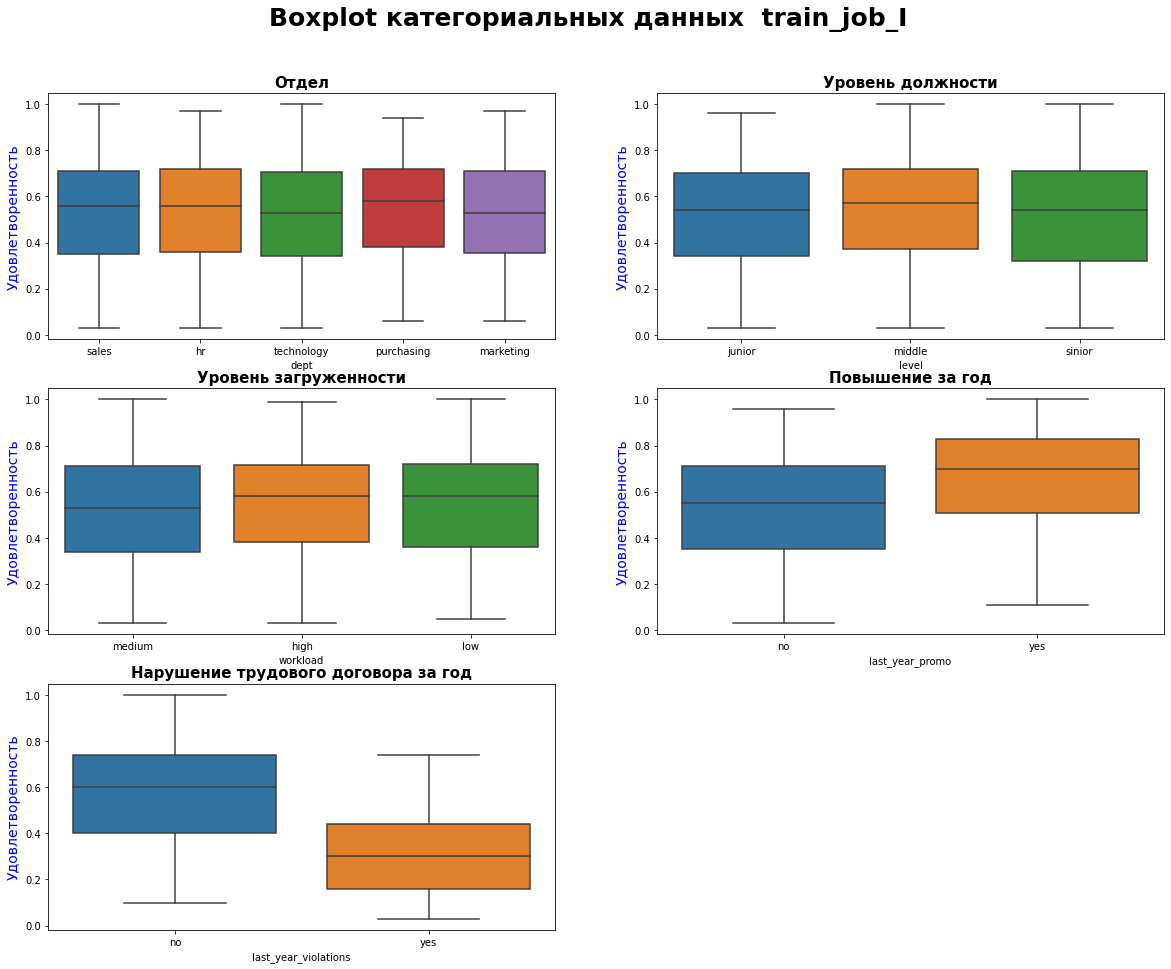

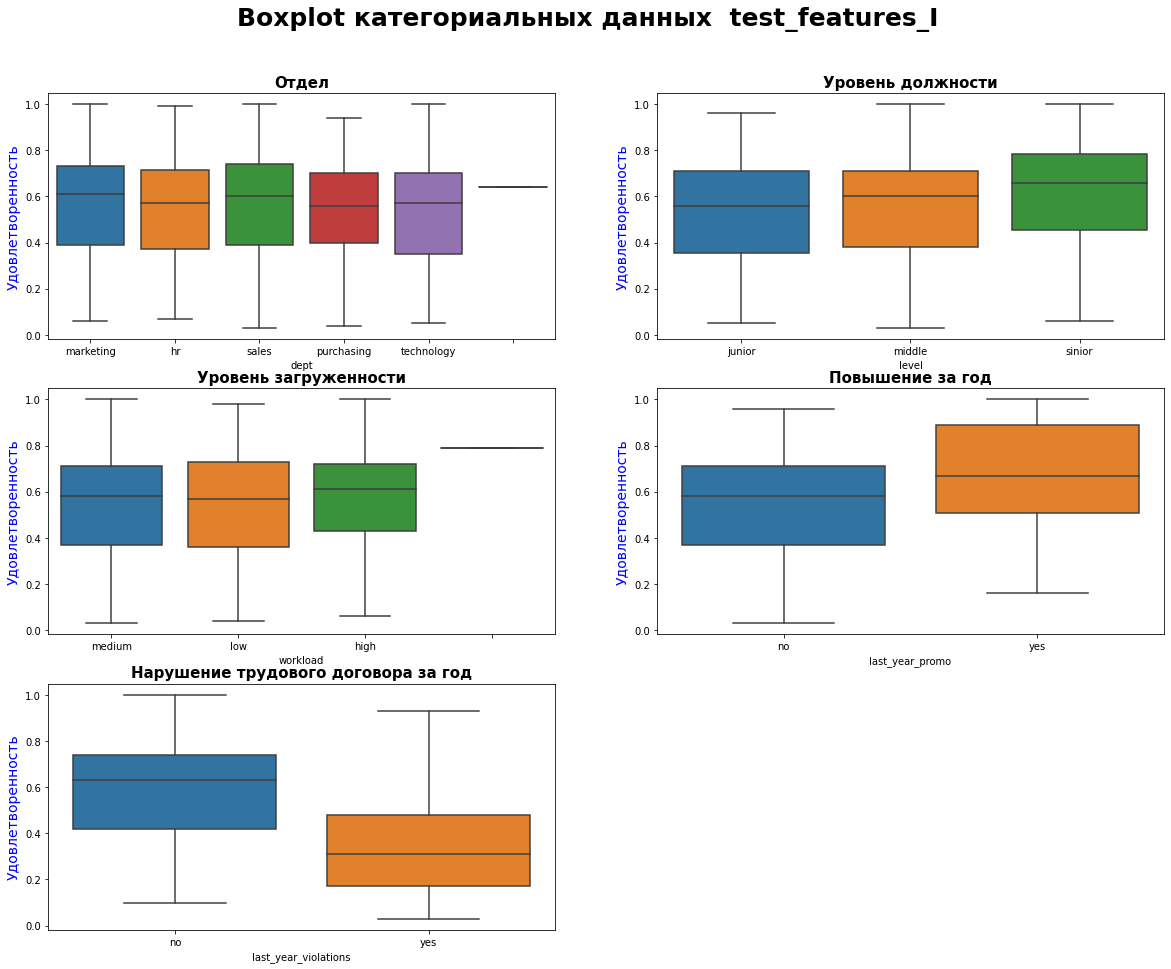

In [67]:
test_features_I_target = test_features_I.merge(test_target_job_I, on='id')

categories_list = (
    ['dept', 
    'level',
    'workload',
    'last_year_promo', 
    'last_year_violations']
)
categories_name_list = (
    ['Отдел', 
    'Уровень должности',
    'Уровень загруженности',
    'Повышение за год', 
    'Нарушение трудового договора за год',
    'Увольнение']
)
discret_list = ['employment_years', 'supervisor_evaluation']
discret_name_list = ['Длительность работы', 'Оценка качества работы']
numeric_list =  ['salary']
numeric_name_list =  ['Зарплата']

fig, axs = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Boxplot категориальных данных  train_job_I', fontsize=25, weight='bold')
k = 0
m = 0
n = 0
for cat in categories_list:
    
    sns.boxplot(x = cat, y = 'job_satisfaction_rate', data = train_job_I, ax=axs[m, k]);

    axs[m, k].set_ylabel('Удовлетворенность', fontsize=14, color='blue')
    axs[m, k].set_title(categories_name_list[n], fontsize=15, weight='bold')
    if k == 1:
        m += 1
        k = 0
        n += 1 
    else:
        k += 1
        n += 1
        
axs[2, 1].axis('off') 
plt.subplots_adjust(top=0.9) 

fig, axs = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Boxplot категориальных данных  test_features_I', fontsize=25, weight='bold')
k = 0
m = 0
n = 0
for cat in categories_list:
    
    sns.boxplot(x = cat, y = 'job_satisfaction_rate', data = test_features_I_target, ax=axs[m, k]);

    axs[m, k].set_ylabel('Удовлетворенность', fontsize=14, color='blue')
    axs[m, k].set_title(categories_name_list[n], fontsize=15, weight='bold')
    if k == 1:
        m += 1
        k = 0
        n += 1 
    else:
        k += 1
        n += 1
        
axs[2, 1].axis('off') 
plt.subplots_adjust(top=0.9) 



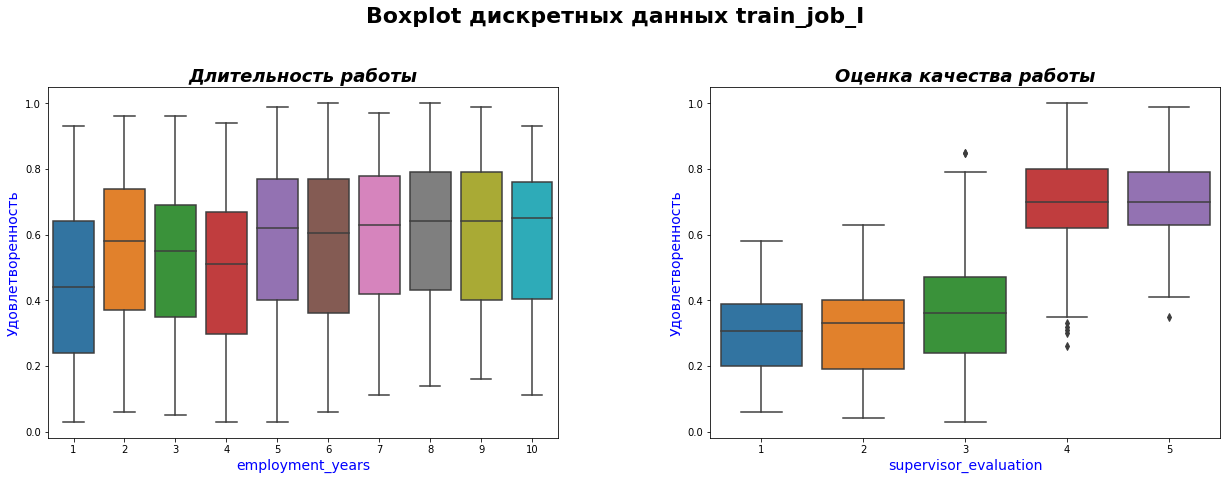

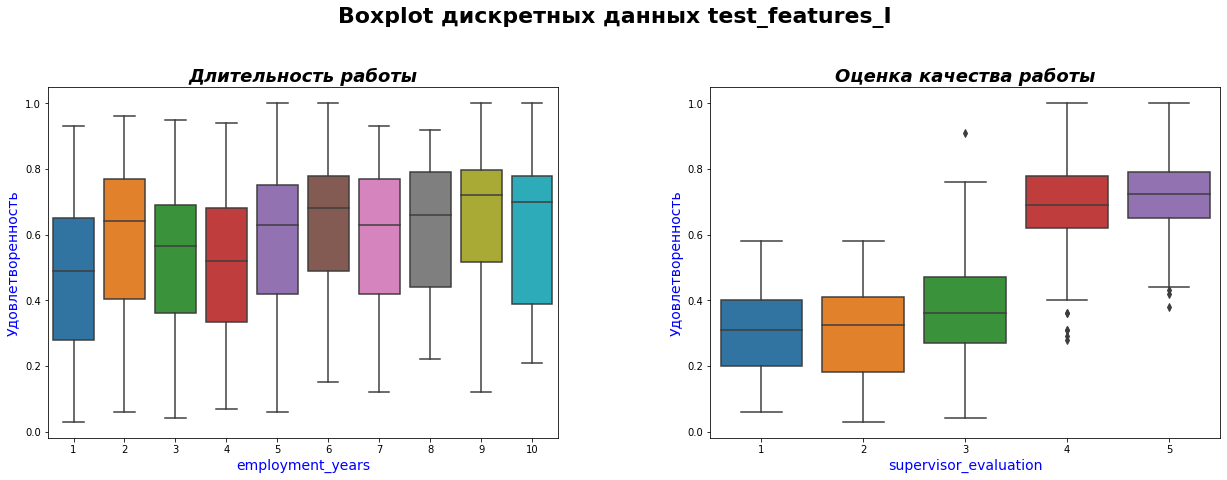

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Boxplot дискретных данных train_job_I', fontsize=22, weight='bold')
k = 0
for cat in discret_list:
    sns.boxplot(x = cat, y = 'job_satisfaction_rate', data = train_job_I, ax=axs[ k]);
    axs[k].set_xlabel(cat, fontsize=14, color='blue')
    axs[k].set_ylabel('Удовлетворенность', fontsize=14, color='blue')
    axs[k].set_title(discret_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.82, wspace=0.3, hspace=0.5) 


fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Boxplot дискретных данных test_features_I', fontsize=22, weight='bold')
k = 0
for cat in discret_list:
    sns.boxplot(x = cat, y = 'job_satisfaction_rate', data = test_features_I_target, ax=axs[ k]);
    axs[k].set_xlabel(cat, fontsize=14, color='blue')
    axs[k].set_ylabel('Удовлетворенность', fontsize=14, color='blue')
    axs[k].set_title(discret_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.82, wspace=0.3, hspace=0.5) 

На диаграмах распределения категориальных данных датасета train_job_I видно:
* наибольшее количество сотрудников из отделов sales (37.9%) и technology(21.7%);
* распределение сотрудников по уровням junior(47.4%) и middle(43.6%) примерно одинаковы, меньше всего sinior(9.0%);
* у большей части работников средняя нагрузка;
* за последний год повышение было только у 3% работников;
* трудовой договор нарушали 14% сотрудников.


На диаграмах распределения категориальных данных датасета test_features_I видно:
* наибольшее количество сотрудников из отделов sales (38.2%) и technology(22.8%);
* распределение сотрудников по уровням junior(48.7%) и middle(42.7%) примерно одинаковы, меньше всего sinior(8.6%);
* у большей части работников средняя нагрузка;
* за последний год повышение было только у 3.2% работников;
* трудовой договор нарушали 13.1% сотрудников.

Для датасетов train_job_I и test_features_I:

* На графиках распределения количественный данных у удовлетворенности нормальное распределение, у признака salery распределение смещенно влево. 
* На графиках распределения катигориальных признаков видно, что наибольшее количество сотрудников работает 1 год, далее с возрастанием срока работы, количество сотрудников снижается. Большая часть работников оценивается начальством на 3-4 по 5-балльной шкале.
* По boxplot видно, что наиболее удовлетворены работники из отдела закупок, уровнем должности middle, имевшие повышение, не нарушающие трудовой договор, работающие 5 лет и более, имеющие оценку руководства 4-5.


В целом распредление признаков в тренировочной и тестовой выборках похожи.

Выбросов в тренировочном дтасете не выявлено, данные необходимо подготовить в соответствии с их типом:
* категориальные - OneHotEncoder
* дискретные - OrdinalEncoder
* количественные - StandardScaler или MinMaxScaler

### Корреляционный анализ

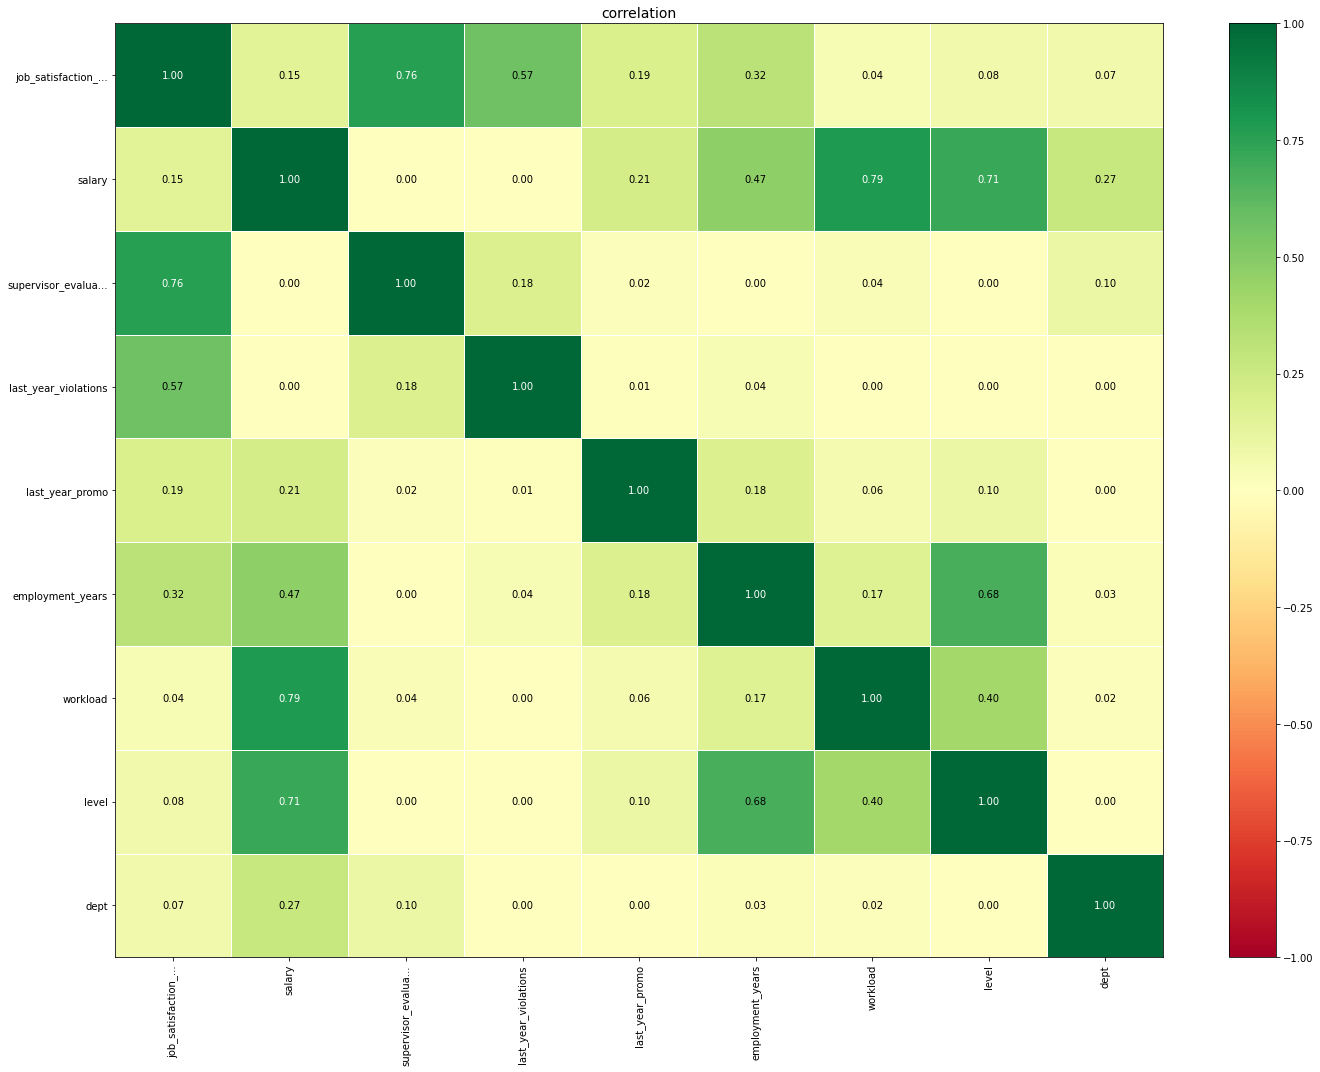

In [69]:
interval_cols = ['salary', 'job_satisfaction_rate']

phik_overview = phik_matrix(train_job_I, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15)
) 

Все коэффициенты корреляции меньше 0.9, мультиколлинеарности не выявлено.

Построим диаграммы рассеяния

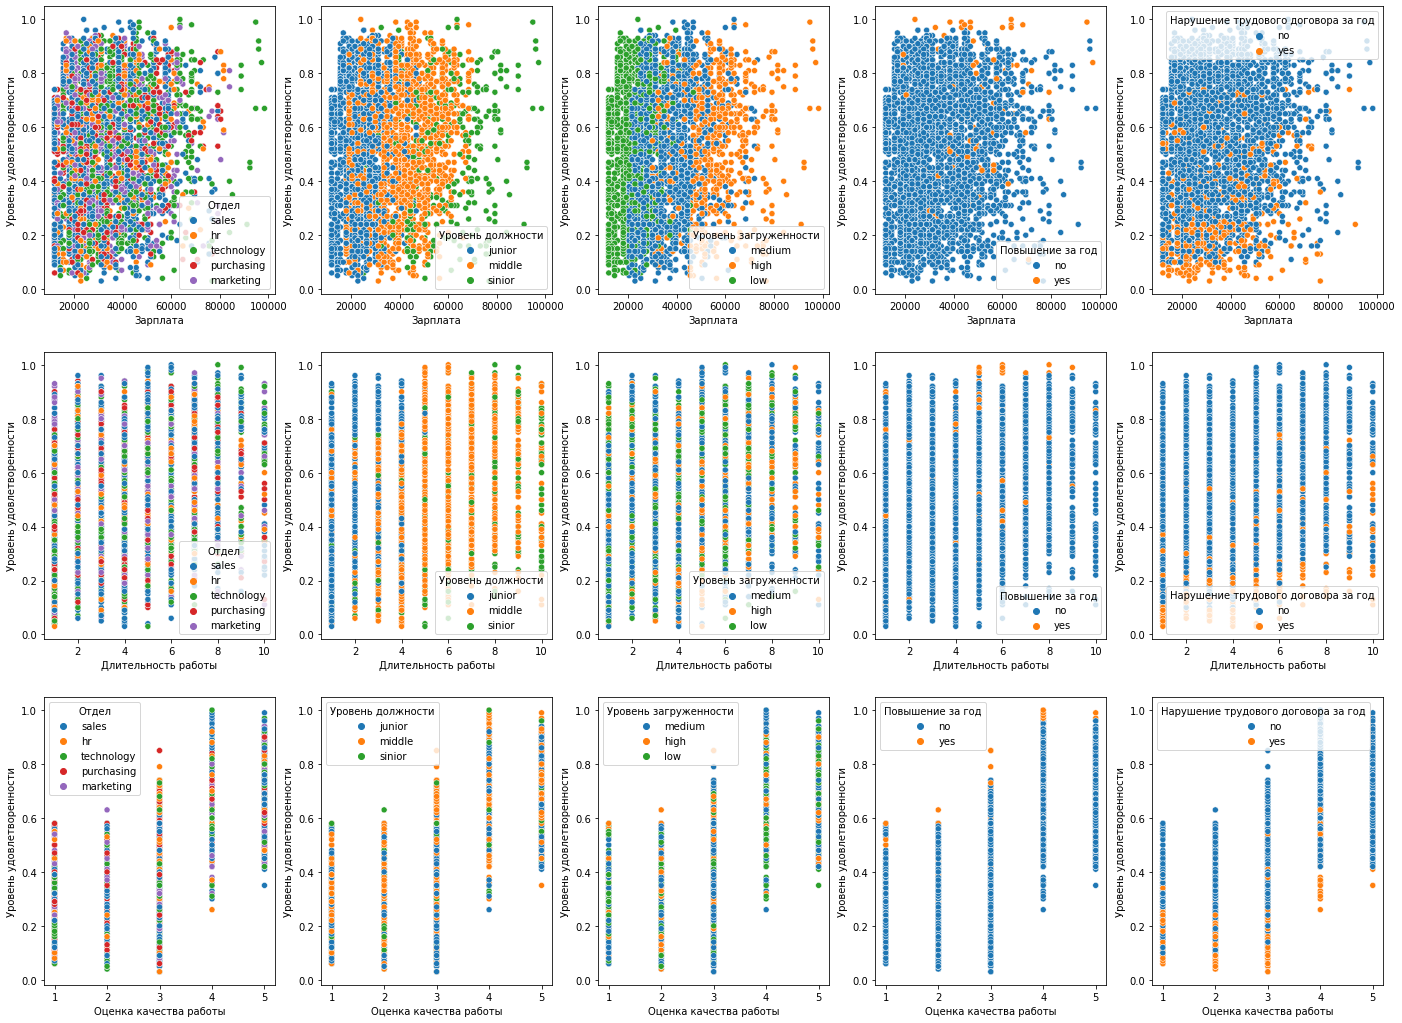

In [70]:
def scat(har, tit):
    cat_quantitative_list = ['salary','employment_years', 'supervisor_evaluation']
    
    ct_quant = ['Зарплата','Длительность работы', 'Оценка качества работы']
    categories_list = (
    ['dept', 
    'level',
    'workload',
    'last_year_promo', 
    'last_year_violations']
)
        
    ct = (
    ['Отдел', 
    'Уровень должности',
    'Уровень загруженности',
    'Повышение за год', 
    'Нарушение трудового договора за год']
)

    fig, axs = plt.subplots(3, 5, figsize=(24, 18))

    k = 0
    m = 0
    for cat_q in cat_quantitative_list:
        for cat_c in categories_list:
            sns.scatterplot(
                x=cat_q, 
                y=har, 
                hue=cat_c, 
                data=train_job_I,
                ax=axs[k, m]
            );

            axs[k, m].set_xlabel(ct_quant[k])
            axs[k, m].set_ylabel(tit)
            axs[k, m].legend(title=ct[m])
            m +=1
        k += 1
        m = 0
        

    
scat('job_satisfaction_rate', 'Уровень удовлетворенности')


Присутствуют нелинейные зависимости.

### Моделирование

Создадим метрику SMAPE для оценки качества моделей.

In [71]:
def smape(y_true, y_pred):

    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    denominator[denominator == 0] = 1e-10 # Малое значение вместо нуля
    
    smape_value = 100 * np.mean(numerator / denominator)
    
    return smape_value
    
smape_scorer = make_scorer(smape, greater_is_better=False)

Создадим функцию с полным пайплайном для поиска лучшей модели. Для оценки качества будем использовать метрику SMAPE.

In [72]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

ord_columns = (
        ['level',
        'workload']
)
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


def pip_find_model_1(df):

    X_train = df.drop(columns='job_satisfaction_rate')
    y_train = df['job_satisfaction_rate']
    
        # создаём пайплайн OHE-кодирование
    ohe_pipe = Pipeline(
            [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
             ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
            ]
    )

        # создаём пайплайн Ordinal-кодирование

    ord_pipe = Pipeline(
            [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
             ('ord',  OrdinalEncoder(
                 categories=[
                            ['junior', 'middle', 'sinior'],
                            ['low', 'medium', 'high']
                        ],
                     handle_unknown='use_encoded_value', unknown_value=np.nan)),
             ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
            ]
    )

        # создаём общий пайплайн для подготовки данных
    data_preprocessor = ColumnTransformer(
            [('cat', ohe_pipe, ohe_columns),
             ('dis', ord_pipe, ord_columns),
             ('num', MinMaxScaler(), num_columns)
            ], 
            remainder='passthrough'
    )


    # создаём итоговый пайплайн: подготовка данных и модель
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ])

    param_grid = [
        # словарь для модели DecisionTreeRegressor()
        {
            'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
            'models__min_samples_split': range(2, 20),
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        },

        # Словарь для модели LinearRegression
        {
            'models': [LinearRegression()],
            'models__fit_intercept': [True, False],
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        }

    ]


    grid_search = GridSearchCV(
        pipe_final,
        param_grid,
        n_jobs=-1,
        cv=5,
        scoring=smape_scorer,
        error_score='raise'
    )
    grid_search.fit(X_train, y_train)
    
    print('Лучшая модель и её параметры:\n\n', grid_search.best_params_)
    print ('Метрика SMAPE лучшей модели на кросс-валидации:', round(np.abs(grid_search.best_score_), 1))
    
    return grid_search

Обучим и определим лучшую модель на исходных данных

In [73]:
model_grid_jsr = pip_find_model_1(train_job_I)

Лучшая модель и её параметры:

 {'models': DecisionTreeRegressor(random_state=42), 'models__min_samples_split': 8, 'preprocessor__num': MinMaxScaler()}
Метрика SMAPE лучшей модели на кросс-валидации: 15.1


Вывести результаты оценки Топ-10 лучших моделей.

In [74]:
cv_results = pd.DataFrame(model_grid_jsr.cv_results_) 
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)
cv_results.iloc[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__min_samples_split,param_preprocessor__num,param_models__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.027095,0.000231,0.011661,0.000427,DecisionTreeRegressor(random_state=42),8,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.059701,-14.170344,-16.024555,-15.832615,-14.216417,-15.060726,0.778514,1
20,0.024744,0.000642,0.010277,0.000295,DecisionTreeRegressor(random_state=42),8,passthrough,NaN,{'models': DecisionTreeRegressor(random_state=...,-15.045120,-14.188023,-15.995493,-15.888105,-14.357231,-15.094794,0.749574,2
16,0.026824,0.000614,0.011404,0.000334,DecisionTreeRegressor(random_state=42),7,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.102058,-14.085956,-16.232367,-15.723443,-14.368673,-15.102499,0.804243,3
17,0.025747,0.000895,0.011324,0.000683,DecisionTreeRegressor(random_state=42),7,passthrough,NaN,{'models': DecisionTreeRegressor(random_state=...,-15.087476,-14.074717,-16.203305,-15.774326,-14.525876,-15.133140,0.780703,4
31,0.025805,0.001327,0.011217,0.000293,DecisionTreeRegressor(random_state=42),12,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-14.986944,-14.784156,-15.739484,-15.814450,-14.398946,-15.144796,0.550157,5
28,0.027039,0.000399,0.010976,0.000519,DecisionTreeRegressor(random_state=42),11,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.323361,-14.748258,-15.784777,-15.504927,-14.389170,-15.150099,0.509750,6
25,0.026610,0.000446,0.011357,0.000327,DecisionTreeRegressor(random_state=42),10,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.308512,-14.602953,-15.757188,-15.636731,-14.445561,-15.150189,0.534080,7
18,0.026879,0.000508,0.011382,0.000648,DecisionTreeRegressor(random_state=42),8,StandardScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.135308,-14.166882,-16.286192,-15.853183,-14.311373,-15.150588,0.831316,8
22,0.026418,0.000249,0.011797,0.000340,DecisionTreeRegressor(random_state=42),9,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.231695,-14.151105,-16.132195,-15.980309,-14.267587,-15.152578,0.829120,9
13,0.026190,0.000600,0.011043,0.000293,DecisionTreeRegressor(random_state=42),6,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.060369,-13.961029,-16.157705,-16.021468,-14.580037,-15.156122,0.839200,10


Рассчитаем метрику SMAPE на тестовых данных. 

In [75]:
data_test_1 = test_features_I.merge(test_target_job_I, on='id')
data_test_1.set_index('id', inplace=True)


X_test_1 = data_test_1.drop(columns='job_satisfaction_rate')
y_test_1 = data_test_1['job_satisfaction_rate']

y_pred_1 = model_grid_jsr.best_estimator_.predict(X_test_1)
print('Метрика SMAPE лучшей модели на тестовых данных:', round(smape(y_test_1, y_pred_1), 1))


Метрика SMAPE лучшей модели на тестовых данных: 13.6


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Модель успешна, так как по условиям задачи SMAPE должен быть меньше 15.

Проверим модель по распределению остатков и дисперсии.

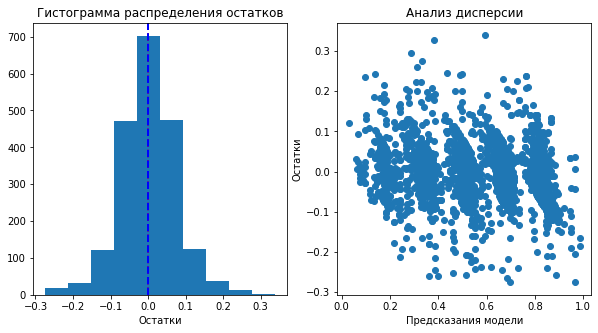

In [76]:
residuals = y_test_1 - y_pred_1
mean_value = residuals.mean()
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
axes[0].axvline(0, color='blue', linestyle='dashed', linewidth=2)
    
axes[1].scatter(x=y_pred_1, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
    
plt.show()

Модель работает хорошо

### Вывод к задаче I

Проведена обработка тренировочного датасета, удалены дубликаты. Проведен исследовательский анализ данных,  дданные распределены нормально, выбросов не обнаружено. На корреляционной матрице мультиколлинеарности признаков не выявлено. Написана метрика SMAP для оценки качества моделей в пайплайне и на тестовых данных. С помощью одного общего пайплайна для всех моделей и инструмента подбора гиперпараметров(GrisSearchCV) проведен поиск лучшей из 2 моделей(DecisionTreeRegressor(), LinearRegression()). Лучшей оказалась модель DecisionTreeRegressor с показателем SMAPE ниже 15, что соответствует условию задачи. DecisionTreeRegressor справилась лучше из-за наличия нелинейных связей.

## Предсказание увольнения сотрудника из компании

### Подготовительный этап 

In [77]:
train_quit_II = pd.read_csv('/datasets/train_quit.csv', sep=',')
test_features_II = pd.read_csv('/datasets/test_features.csv', sep=',')
test_target_quit_II= pd.read_csv('/datasets/test_target_quit.csv', sep=',')

In [78]:
train_quit_II.info()
train_quit_II.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [79]:
test_features_II.info()
test_features_II.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [80]:
test_target_quit_II.info()
test_target_quit_II.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Всего загружено 3 датасета, содеражих: 4000 строк тренировочных данных о работниках; 2000 строк тестовых данных о работниках; 2000 строк данных целевого параметра. в датафреймах корректные названия колонок, в столбцах 'dept' и 'level' тестовых данных есть пропуски, которые обработаются дальше в пайплайне. 

Сделаем 'id' индексом датасета train_quit_II

In [81]:
train_quit_II.set_index('id', inplace=True)

<span style="font-size: 14px;"><b> Проверим на наличие неявных дубликатов </b></span> 

In [82]:
list_df_cat = (
    ['dept', 'level', 'workload', 
     'last_year_promo', 'last_year_violations', 
     'employment_years', 'supervisor_evaluation', 'quit']
)

print('\033[1mtrain_quit_II\033[0m')  
for col in list_df_cat:
    print(col, ':', train_quit_II[col].unique())    


train_quit_II
dept : ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level : ['middle' 'junior' 'sinior']
workload : ['high' 'medium' 'low']
last_year_promo : ['no' 'yes']
last_year_violations : ['no' 'yes']
employment_years : [ 2  5  1  8  4  7  3  9  6 10]
supervisor_evaluation : [4 1 3 5 2]
quit : ['no' 'yes']


Неявных дубликатов не обнаружено

<span style="font-size: 14px;"><b> Проверим на наличие явных дубликатов в train_quit_II</b></span> 

In [83]:
print('дубликаты train_quit_II -', train_quit_II.duplicated().sum())

дубликаты train_quit_II - 1413


Удалим строки с полностью дублирующимися параметрами

In [84]:
train_quit_II = train_quit_II.drop_duplicates()
train_quit_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 723290 to 692133
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   2587 non-null   object
 1   level                  2587 non-null   object
 2   workload               2587 non-null   object
 3   employment_years       2587 non-null   int64 
 4   last_year_promo        2587 non-null   object
 5   last_year_violations   2587 non-null   object
 6   supervisor_evaluation  2587 non-null   int64 
 7   salary                 2587 non-null   int64 
 8   quit                   2587 non-null   object
dtypes: int64(3), object(6)
memory usage: 202.1+ KB


Данные подготовлены для исследовательского анализа данных. Явных и неявных дубликатов не выявлено. Тип данных признаков корректны.

### Исследовательский анализ данных

#### Анализ данных

<span style="font-size: 14px;"><b>Построим графики распределения свойств для категориальных и количественных (непрервыных и дискретнных) признаков по датасетам.</b></span> 

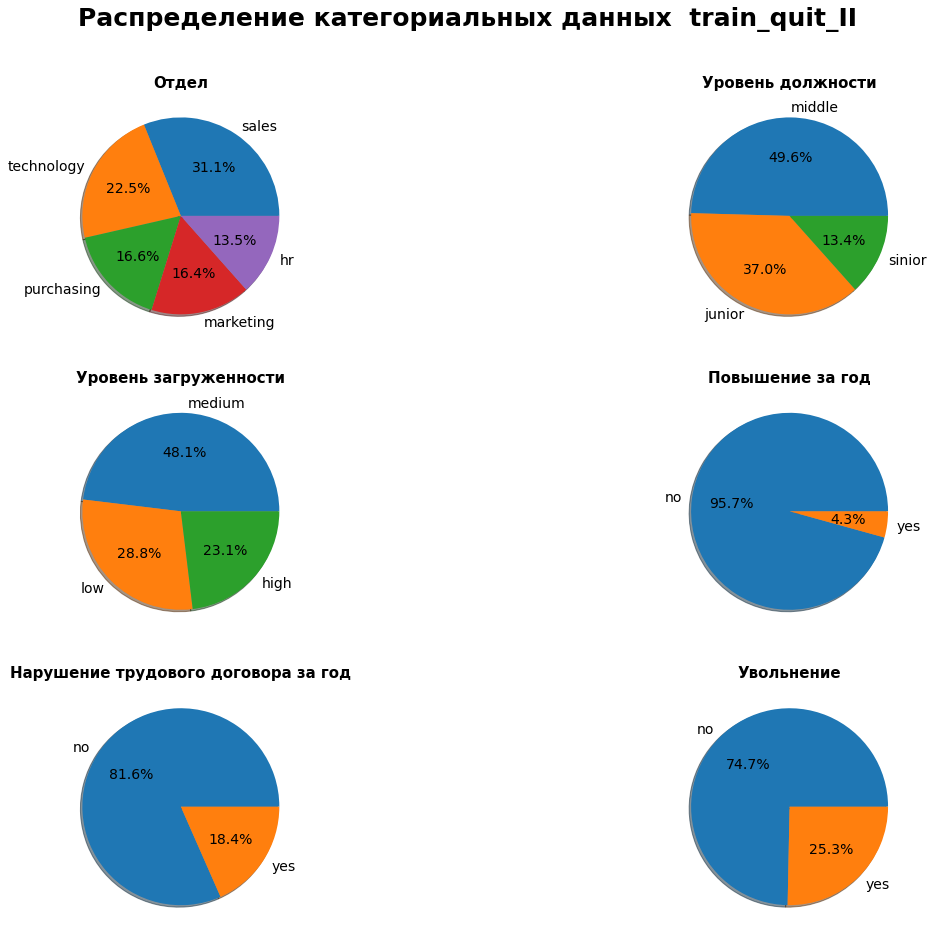

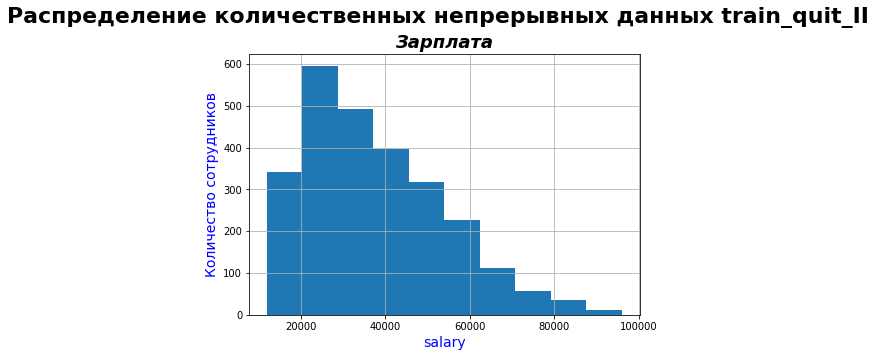

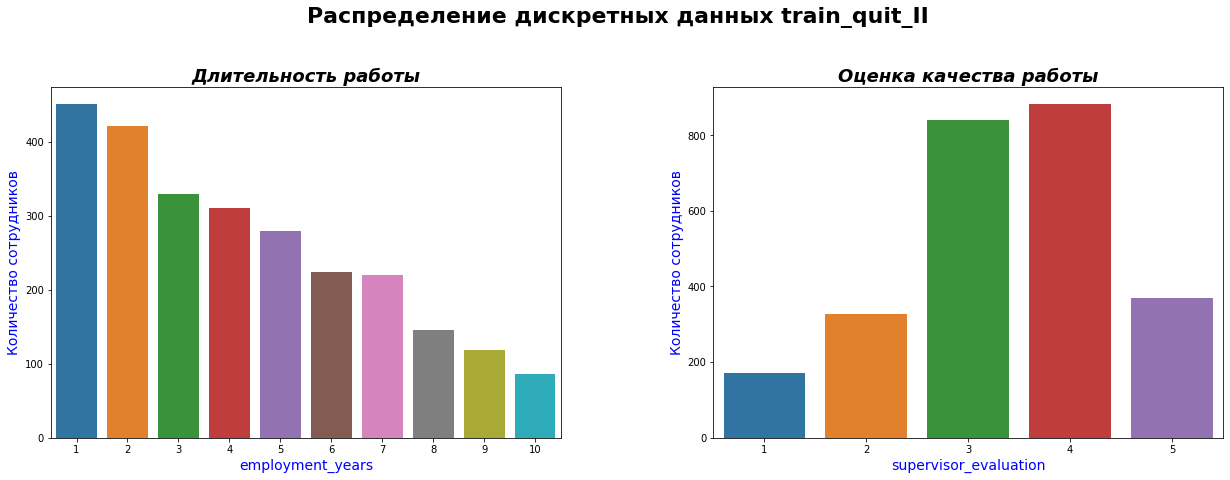

In [85]:
categories_list = (
    ['dept', 
    'level',
    'workload',
    'last_year_promo', 
    'last_year_violations',
    'quit']
)
categories_name_list = (
    ['Отдел', 
    'Уровень должности',
    'Уровень загруженности',
    'Повышение за год', 
    'Нарушение трудового договора за год',
    'Увольнение']
)
discret_list = ['employment_years', 'supervisor_evaluation']
discret_name_list = ['Длительность работы', 'Оценка качества работы']
numeric_list =  ['salary']
numeric_name_list =  ['Зарплата']

fig, axs = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('Распределение категориальных данных  train_quit_II', fontsize=25, weight='bold')
k = 0
m = 0
n = 0
for cat in categories_list:
    train_quit_II[cat].value_counts().plot.pie(
        autopct='%1.1f%%',
        shadow=True,
        fontsize=14,                              
        legend=False,
        ylabel='',
        ax=axs[m, k]
    );
    
    axs[m, k].set_title(categories_name_list[n], fontsize=15, weight='bold')
    if k == 1:
        m += 1
        k = 0
        n += 1 
    else:
        k += 1
        n += 1

plt.subplots_adjust(top=0.9) 


fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Распределение количественных непрерывных данных train_quit_II', fontsize=22, weight='bold')

for cat in numeric_list:
    train_quit_II[cat].hist(ax=ax)
    ax.set_xlabel(cat, fontsize=14, color='blue')
    ax.set_ylabel('Количество сотрудников', fontsize=14, color='blue')
    ax.set_title(numeric_name_list[0], fontsize=18, weight='bold',style='italic')

plt.subplots_adjust(top=0.85) 


fig, axs = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Распределение дискретных данных train_quit_II', fontsize=22, weight='bold')
k = 0
for cat in discret_list:
    sns.countplot(x=cat, data=train_quit_II, ax=axs[k])
    axs[k].set_xlabel(cat, fontsize=14, color='blue')
    axs[k].set_ylabel('Количество сотрудников', fontsize=14, color='blue')
    axs[k].set_title(discret_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.82, wspace=0.3, hspace=0.5) 

# На диаграмах распределения категориальных данных видно:
* наибольшее количество сотрудников из отделов sales (31.1%) и technology(22.5%);
* распределение сотрудников по уровням middle(49.6%) и junior(37.0%), меньше всего sinior(13.4%);
* у большей части работников средняя нагрузка;
* за последний год повышение было только у 4.3% работников;
* трудовой договор нарушали 18.4% сотрудников.
* уволилось 25.3% работников.

На графике распределения непрерывных количественный данных у признака salery распределение смещенно влево. 

На графиках распределения катигориальных признаков видно, что наибольшее количество сотрудников работает 1 год, далее с возрастанием срока работы, количество сотрудников снижается. Большая часть работников оценивается начальством на 3-4 по 5-балльной шкале.


#### Портрет «уволившегося сотрудника»

<span style="font-size: 14px;"><b>Построим диаграммы распределения для котигориальных признаков и боксплоты для количественных в зависимости от увольнения.</b></span> 

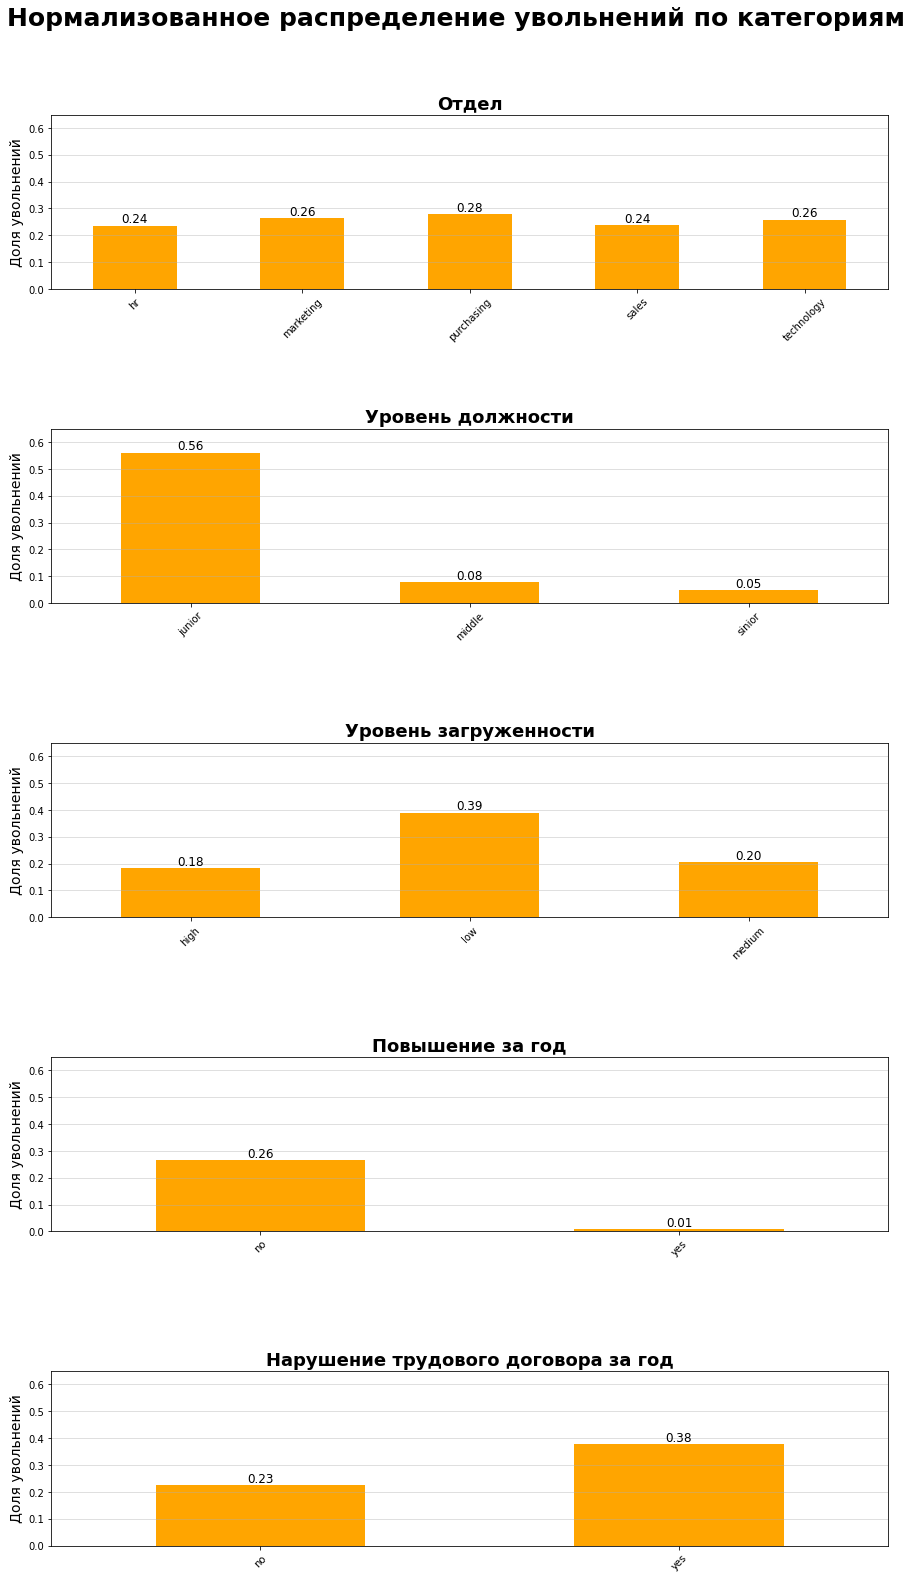

In [86]:

categories_list = (
    ['dept', 
    'level',
    'workload',
    'last_year_promo', 
    'last_year_violations']
)
categories_name_list = (
    ['Отдел', 
    'Уровень должности',
    'Уровень загруженности',
    'Повышение за год', 
    'Нарушение трудового договора за год']
)


quit_rates = {}

# Нормализуем данные и сохраняем результаты
for cat in categories_list:
    quit_rates[cat] = (
        train_quit_II.groupby(cat)['quit']
        .value_counts(normalize=True)
        .unstack()
        .reset_index()
        .rename(columns={'quit': 'Доля увольнений'})
    )

# Создаем новый график с нормализованными данными
fig, axs = plt.subplots(5, 1, figsize=(15, 25))
fig.suptitle('Нормализованное распределение увольнений по категориям', fontsize=25, weight='bold')

for i, cat in enumerate(categories_list):
    # Строим график доли увольнений для каждой категории
    quit_rates[cat].plot(
        x=cat,
        y='yes',
        kind='bar',
        ax=axs[i],
        color='orange',
        legend=False
    )
    
    # Добавляем метки на столбцах
    for container in axs[i].containers:
        axs[i].bar_label(container, fmt='%.2f', fontsize=12)
    
    # Форматируем график
    axs[i].set_title(categories_name_list[i], fontsize=18, weight='bold')
    axs[i].set_ylabel('Доля увольнений', fontsize=14)
    axs[i].set_xlabel('')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', alpha=0.5)
    axs[i].set_ylim(0, 0.65)
    
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.8)
plt.show()

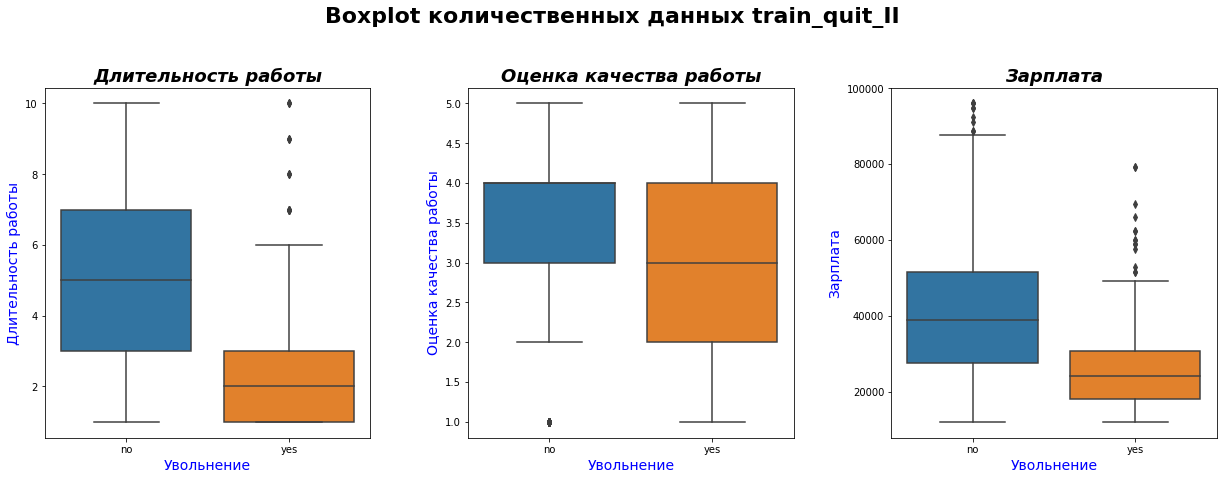

In [87]:

numeric_list =  ['employment_years', 'supervisor_evaluation','salary']
numeric_name_list =  ['Длительность работы', 'Оценка качества работы', 'Зарплата']


fig, axs = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle('Boxplot количественных данных train_quit_II', fontsize=22, weight='bold')
k = 0
for cat in numeric_list:
    sns.boxplot(x = 'quit', y = cat, data = train_quit_II, ax=axs[k]);
    axs[k].set_xlabel('Увольнение', fontsize=14, color='blue')
    axs[k].set_ylabel(numeric_name_list[k], fontsize=14, color='blue')
    axs[k].set_title(numeric_name_list[k], fontsize=18, weight='bold',style='italic')
    k += 1

plt.subplots_adjust(top=0.82, wspace=0.3, hspace=0.5) 


Сгруппируем данные по двум категориям уволившиеся и нет. Для категориальных и дискретных данных возьмем моду, для количественных непрерывных - медиану.

In [88]:
result = train_quit_II.groupby('quit').agg({
    'level' : lambda x: x.mode().iloc[0],
    'workload' : lambda x: x.mode().iloc[0],
    'employment_years' : lambda x: x.mode().iloc[0],
    'supervisor_evaluation' : lambda x: x.mode().iloc[0],
    'salary': 'median'
})
result.head()

,level,workload,employment_years,supervisor_evaluation,salary
quit,,,,,
no,middle,medium,4,4,39000
yes,junior,low,1,3,24000


Исходя из диграмм распределения категориальных признаков, боксплотов количественных признаков и таблицы групировки по наличию увольнения вытекает следующий портрет уволившегося сотрудника: 
* Отдел - любой
* Уровень должности - junior
* Уровень загруженности - низкий
* Длительность работы - 1-2 года
* Зарплата - относительно низкая
* Повышение - отсутствует
* Нарушения - выше среднего

#### Анализ влияния удовлетворенности работой

Обьедеим тестовые данные с целевыми признаками уровня удовлетворенности и увольнения. Построи боксплоты зависимости увольнения от коэффициента удовлетворенности .

In [89]:
data_target_test_svod = test_target_job_I.merge(test_target_quit_II, on='id')

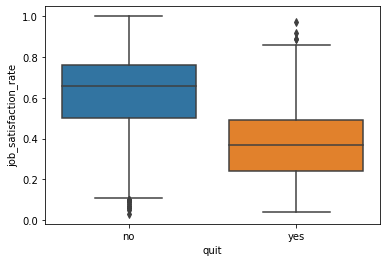

In [90]:
sns.boxplot(x = 'quit', y = 'job_satisfaction_rate', data = data_target_test_svod);

In [91]:
data_target_test_svod.groupby('quit').agg('median')

,id,job_satisfaction_rate
quit,,
no,546372,0.66
yes,554657,0.37


Из боксплота видно, что у уволившихся сотрудников средний коэффициент удовлетворенности был ниже чем у оставшихся. Увольнение и коэффициент удовлетворенности взаимосвязаны.

### Корреляционный анализ

Добавим в тестовые данные показатель удовлетворенности, который предскажем с помощью ранее полученной модели из задачи I.

In [92]:
y_pred_jsr = model_grid_jsr.best_estimator_.predict(train_quit_II.drop(columns='quit'))
pred_series_jsr = pd.Series(y_pred_jsr, index=train_quit_II.index, name='job_satisfaction_rate')
data_train_svod = train_quit_II.join(pred_series_jsr)
data_train_svod.info()
data_train_svod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 723290 to 692133
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   2587 non-null   object 
 1   level                  2587 non-null   object 
 2   workload               2587 non-null   object 
 3   employment_years       2587 non-null   int64  
 4   last_year_promo        2587 non-null   object 
 5   last_year_violations   2587 non-null   object 
 6   supervisor_evaluation  2587 non-null   int64  
 7   salary                 2587 non-null   int64  
 8   quit                   2587 non-null   object 
 9   job_satisfaction_rate  2587 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 286.9+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.600000
814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


Построим корреляционную матрицу для признаков.

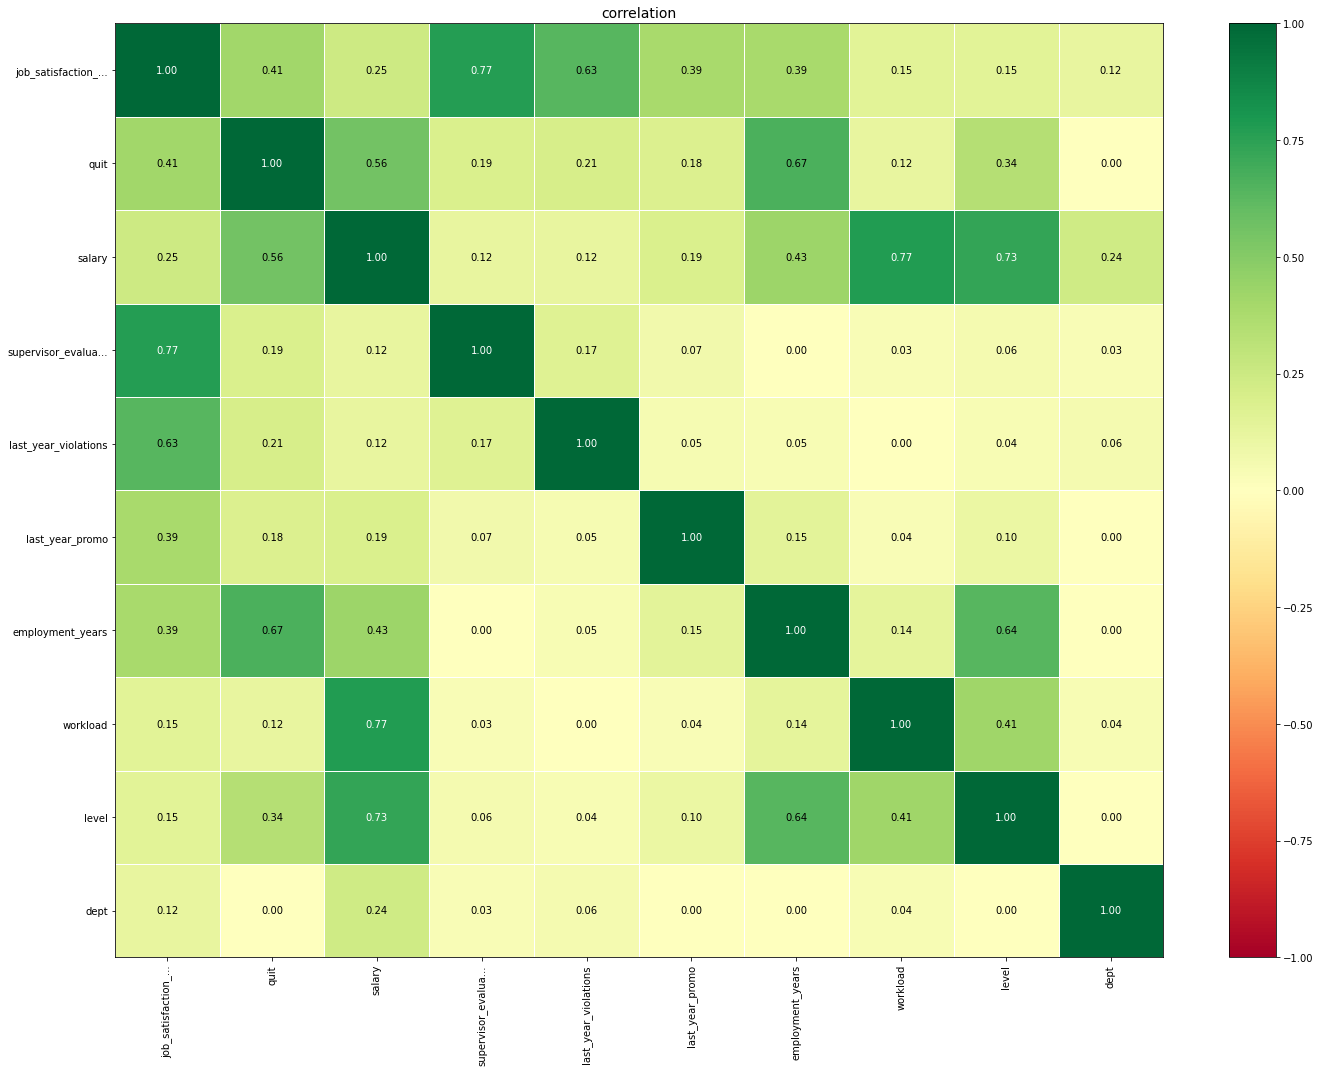

In [93]:
interval_cols = ['salary', 'job_satisfaction_rate']

phik_overview = phik_matrix(data_train_svod, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15)
) 

Все коэффициенты корреляции меньше 0.9, мультиколлинеарности не выявлено.

### Моделирование

Соединим тестовые признаки в задаче II с целевыми из I и II задач, для использования в оценке моделей.

In [94]:
test_target_quit_II.set_index('id', inplace=True)
test_features_II.set_index('id', inplace=True)
pred_series_test_jsr = model_grid_jsr.best_estimator_.predict(test_features_II)
pred_series_test_jsr = pd.Series(pred_series_test_jsr, index=test_features_II.index, name='job_satisfaction_rate')
data_test_svod_2 = (test_features_II.join(pred_series_test_jsr)).join(test_target_quit_II)
data_test_svod_2.info()
data_test_svod_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1998 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               2000 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
 9   quit                   2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 236.4+ KB


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.885000,no
686555,hr,junior,medium,1,no,no,4,30000,0.681429,no
467458,sales,middle,low,5,no,no,4,19200,0.654000,no
418655,sales,middle,low,6,no,no,4,19200,0.655000,no
789145,hr,middle,medium,5,no,no,5,40800,0.812500,no


Создадим функцию с полным пайплайном для поиска лучшей модели. Для оценки качества будем использовать метрику ROC-AUC, так как не зависит от соотношения классов, метрика учитывает как True Positive Rate, так и False Positive Rate.

In [95]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

ord_columns = (
        ['level',
        'workload']
)
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


def pip_find_model_2(df,df_test):

    X_train = df.drop(columns='quit')
    y_train = df['quit']

    X_test = df_test.drop(columns='quit')
    y_test = df_test['quit']
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
        # создаём пайплайн OHE-кодирование
    ohe_pipe = Pipeline(
            [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
             ('ohe', OneHotEncoder(drop="first", handle_unknown='ignore', sparse=False))
            ]
    )

        # создаём пайплайн Ordinal-кодирование

    ord_pipe = Pipeline(
            [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
             ('ord',  OrdinalEncoder(
                 categories=[
                            ['junior', 'middle', 'sinior'],
                            ['low', 'medium', 'high']
                        ],
                     handle_unknown='use_encoded_value', unknown_value=np.nan)),
             ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
            ]
    )

        # создаём общий пайплайн для подготовки данных
    data_preprocessor = ColumnTransformer(
            [('cat', ohe_pipe, ohe_columns),
             ('dis', ord_pipe, ord_columns),
             ('num', MinMaxScaler(), num_columns)
            ], 
            remainder='passthrough'
    )


    # создаём итоговый пайплайн: подготовка данных и модель
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ])

    param_grid = [
        # словарь для модели DecisionTreeClassifier()
        {
            'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
            'models__max_depth': range(5, 16),
            'models__max_features': ['sqrt', 'log2'],
            'models__min_samples_split': range(5, 11),
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
        },

        # словарь для модели KNeighborsClassifier() 
        {
            'models': [KNeighborsClassifier()],
            'models__n_neighbors': range(5, 11),
            'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
        },

        # словарь для модели LogisticRegression()
        {
            'models': [LogisticRegression(
                random_state=RANDOM_STATE, 
                solver='liblinear', 
                penalty='l1'
            )],
            'models__C': range(1, 11),
            'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
        },

        # словарь для модели SVC()
        {
            'models': [SVC(random_state=RANDOM_STATE, probability=True)],
            'models__kernel': ['linear', 'rbf'],
            'models__degree': range(1, 7),
            'preprocessor__num': [StandardScaler(), MinMaxScaler()]  

        }
    ]


    randomized_search = RandomizedSearchCV(
        pipe_final, 
        param_grid,
        n_iter=200,
        cv=5,
        scoring='roc_auc',
        random_state=RANDOM_STATE,
    )
    randomized_search.fit(X_train, y_train_encoded)
    y_pred_2 = randomized_search.best_estimator_.predict(X_test)

    print('Лучшая модель и её параметры:\n\n', randomized_search.best_params_)
    print ('Метрика лучшей модели ROC-AUC на кросс-валидации:', round(randomized_search.best_score_, 2))
    print ('Метрика лучшей модели ROC-AUC на тестовых данных:', round(randomized_search.best_score_, 2))
    
    return randomized_search

In [96]:
model_random_quit = pip_find_model_2(data_train_svod, data_test_svod_2)

Лучшая модель и её параметры:

 {'preprocessor__num': StandardScaler(), 'models__C': 8, 'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear')}
Метрика лучшей модели ROC-AUC на кросс-валидации: 0.9
Метрика лучшей модели ROC-AUC на тестовых данных: 0.9


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Вывести результаты оценки Топ-10 лучших моделей.

In [97]:
cv_results = pd.DataFrame(model_grid_jsr.cv_results_) 
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)
cv_results.iloc[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__min_samples_split,param_preprocessor__num,param_models__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.027095,0.000231,0.011661,0.000427,DecisionTreeRegressor(random_state=42),8,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.059701,-14.170344,-16.024555,-15.832615,-14.216417,-15.060726,0.778514,1
20,0.024744,0.000642,0.010277,0.000295,DecisionTreeRegressor(random_state=42),8,passthrough,NaN,{'models': DecisionTreeRegressor(random_state=...,-15.045120,-14.188023,-15.995493,-15.888105,-14.357231,-15.094794,0.749574,2
16,0.026824,0.000614,0.011404,0.000334,DecisionTreeRegressor(random_state=42),7,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.102058,-14.085956,-16.232367,-15.723443,-14.368673,-15.102499,0.804243,3
17,0.025747,0.000895,0.011324,0.000683,DecisionTreeRegressor(random_state=42),7,passthrough,NaN,{'models': DecisionTreeRegressor(random_state=...,-15.087476,-14.074717,-16.203305,-15.774326,-14.525876,-15.133140,0.780703,4
31,0.025805,0.001327,0.011217,0.000293,DecisionTreeRegressor(random_state=42),12,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-14.986944,-14.784156,-15.739484,-15.814450,-14.398946,-15.144796,0.550157,5
28,0.027039,0.000399,0.010976,0.000519,DecisionTreeRegressor(random_state=42),11,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.323361,-14.748258,-15.784777,-15.504927,-14.389170,-15.150099,0.509750,6
25,0.026610,0.000446,0.011357,0.000327,DecisionTreeRegressor(random_state=42),10,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.308512,-14.602953,-15.757188,-15.636731,-14.445561,-15.150189,0.534080,7
18,0.026879,0.000508,0.011382,0.000648,DecisionTreeRegressor(random_state=42),8,StandardScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.135308,-14.166882,-16.286192,-15.853183,-14.311373,-15.150588,0.831316,8
22,0.026418,0.000249,0.011797,0.000340,DecisionTreeRegressor(random_state=42),9,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.231695,-14.151105,-16.132195,-15.980309,-14.267587,-15.152578,0.829120,9
13,0.026190,0.000600,0.011043,0.000293,DecisionTreeRegressor(random_state=42),6,MinMaxScaler(),NaN,{'models': DecisionTreeRegressor(random_state=...,-15.060369,-13.961029,-16.157705,-16.021468,-14.580037,-15.156122,0.839200,10


Получили хороший результат, но метрика ниже критерия успеха( >=0.91 ). 

Проведем анализ значимости параметров лучшей модели с помощью метода SHAP.

In [98]:
X_train = data_train_svod.drop(columns='quit')
# Получаем лучшую модель
best_model = model_random_quit.best_estimator_

# Получаем преобразованные признаки
transformed_X = best_model.named_steps['preprocessor'].transform(X_train)

preprocessor = best_model.named_steps['preprocessor']

# Получаем функцию предсказания вероятностей
model_func = best_model.named_steps['models'].predict_proba

explainer = shap.KernelExplainer(
    model_func,
    transformed_X[:100],
    seed=0,
    link="logit"
)

# Получаем SHAP значения только для нужных данных
shap_values = explainer.shap_values(transformed_X, nsamples=100, parallel=True)

  0%|          | 0/2587 [00:00<?, ?it/s]

In [101]:
ohe_features = model_random_quit.best_estimator_['preprocessor'].named_transformers_['cat']\
    .named_steps['ohe'].get_feature_names_out(ohe_columns)

# Для OrdinalEncoder сохраняем исходные названия
ord_features = list(ord_columns)

# Для числовых признаков
num_features = num_columns

# Объединяем все названия
final_feature_names = list(ohe_features) + list(ord_features) + list(num_features)


explanation = shap.Explanation(
    values=shap_values[:, :, 1],  # значения для класса 1
    base_values=explainer.expected_value[1],
    data=pd.DataFrame(transformed_X, columns=final_feature_names),
    feature_names=final_feature_names
)


Построим график общей значимости признаков.

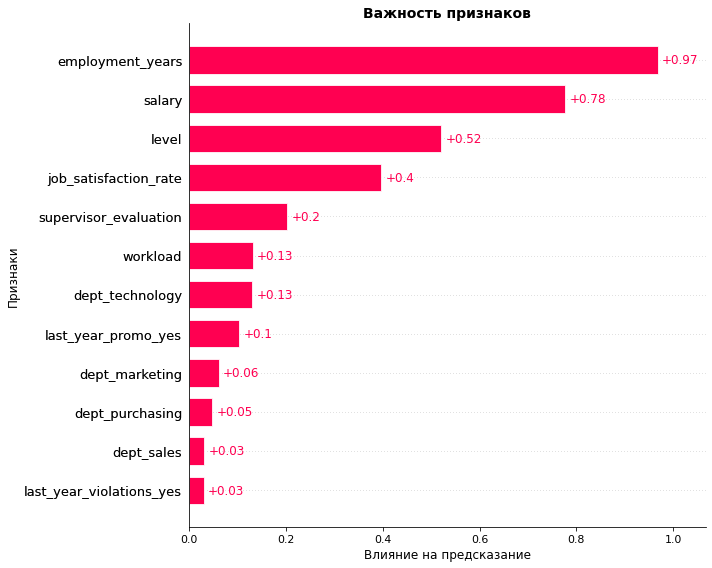

In [102]:
fig, ax = plt.subplots(figsize=(10,8))

shap.plots.bar(explanation, max_display=23, show=False, ax=ax)
ax.set_title('Важность признаков', fontsize=14, weight='bold')
ax.set_xlabel('Влияние на предсказание', fontsize=12)
ax.set_ylabel('Признаки', fontsize=12)

plt.tight_layout()
plt.show()

Из графика общей значимости признаков видно, что параметры 'dept' и 'last_year_violations' не являются значимыми, удалим их из тестовых данных и запустим полный пайплайн заново.

In [103]:
data_train_svod_corr = data_train_svod.drop(columns=['dept','last_year_violations'])
data_test_svod_2_corr = data_test_svod_2.drop(columns=['dept','last_year_violations'])

In [104]:
ohe_columns = ['last_year_promo']

ord_columns = (
        ['level',
        'workload']
)
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

model_random_quit_corr = pip_find_model_2(data_train_svod_corr, data_test_svod_2_corr)

Лучшая модель и её параметры:

 {'preprocessor__num': MinMaxScaler(), 'models__n_neighbors': 10, 'models': KNeighborsClassifier()}
Метрика лучшей модели ROC-AUC на кросс-валидации: 0.91
Метрика лучшей модели ROC-AUC на тестовых данных: 0.91


Метрика лучшей модели после удаления 2 признаков соответствует критерию успеха.

### Вывод к задаче II

Проведена обработка тренировочного датасета, удалены дубликаты. Проведен исследовательский анализ данных,  данные распределены нормально.Построены графики распределения параметров в зависимотси от увольнения сотрудников, сформирован портрет уволившихся работников. Выявлено, что увольнение не зависит от отдела, также не сильно значительно отличие в количестве нарушений. На корреляционной матрице мультиколлинеарности признаков не выявлено. С помощью одного общего пайплайна для всех моделей и инструмента подбора гиперпараметров(RandomizedSearchCV) проведен поиск лучшей из 4 моделей(KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVC). Метрика найденной модели оказалась ниже критерия успеха, построена диаграмма значимости признаков, выявлено, что параметры 'dept' и 'last_year_violations' не являются значимыми. Проведен повторный поиск модели со скорректированными тренироводными данными. Лучшей моделью стала KNeighborsClassifier c n_neighbors=10 и масштабированием MinMaxScaler(). Метрика ROC_AUC = 0.91, что соответствует критерию успеха. Проведена успешная оценка модели на адекватность с помощью меода DummyClassifier. KNeighborsClassifier справилась лучше остальных, так как хорошо работает с нелинейными связями  и показала лучший результат по метрике ROC_AUC.

## Общий вывод

<span style="font-size: 14px;"><b>Задача</b></span> - разработать систему прогнозирования удовлетворенности сотрудников и предсказания их увольнения с использованием методов машинного обучения для оптимизации HR-процессов компании «Работа с заботой».


Для проведения исследования нам предоставлены 5 датасетов:
1. <span style="font-size: 16px;"><b>train_job_satisfaction_rate.csv </b></span> с тренировочными данными о работниках к I задаче; 
2. <span style="font-size: 16px;"><b>test_features.csv </b></span> с тестовой выборкой по работикам;
3. <span style="font-size: 16px;"><b>test_target_job_satisfaction_rate.csv </b></span> с целевым признаком тестовой выборкик I задаче;
4. <span style="font-size: 16px;"><b>train_quit.csv </b></span> с тренировочными данными о работниках ко II задаче;
5. <span style="font-size: 16px;"><b>train_target_quit.csv </b></span> с целевым признаком тестовой выборки ко II задаче.


<span style="font-size: 14px;"><b>Предобработка:</b></span>
* id преобразован в индекс
* убраны явные дубликаты

Для поиска лучшей модели проведено изучение распределения свойств для категориальных и количественных признаков по датасетам. Составлен портрет уволивегося сотрудника. Выявлена обратная взаимосвязь между увольнением и уровнем удовлетворенности. Проведен корреляционный анализ с помощью матрицы для всех признаков датасета, установлено отсутствие мультиколлинеарности. В первой задаче написана функция метрики SMAP. С помощью одного общего пайплайнадля всех моделей, метрики SMAP и инструмента подбора гиперпараметров(GridSearchCV) проведен поиск лучшей из 2 моделей(DecisionTreeRegressor(), LinearRegression()). 


Лучшей оказалась модель DecisionTreeRegressor с гипперпараметром min_samples_split=8 и показателем SMAPE ниже 15, что соответствует условию задачи. Модель проверена по распределению остатков и дисперсии, работает хорошо.



Далее с помощью модели DecisionTreeRegressor предсказаны значения удовлетворенности на тернировочном датасете 2 задачи. Далее во 2 задаче было необходимо подобрать модель для прогнозирования увольнения сотрудников. С помощью одного общего пайплайна для всех моделей и инструмента подбора гиперпараметров(RandomizedSearchCV) проведен поиск лучшей из 4 моделей (KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()) после 200 итерраций. Полученная модель не соответствовала критериям успешности , метрика ROC-AUC была меньше 0.91. С помощью метода SHAP проведена оценка важности признаков для лучшей модели и построены графики важности. Из датасета исключены параметры 'dept' и 'last_year_violations', не являющиеся значимыми. Проведен повторный поиск модели со скорректированными тренироводными данными.

Лучшей оказалась модель KNeighborsClassifier c n_neighbors=10 и масштабированием MinMaxScaler(), метрика ROC-AUC на тестовой и тестовой выборке показала 0,91. 

Для пргнозирования удовлетворенности сотрудников можно использовать модель DecisionTreeRegressor с гипперпараметром min_samples_split=8. При прогнозировании увольнения сотрудников рекомендуется использовать модель KNeighborsClassifier c n_neighbors=10 и масштабированием MinMaxScaler(), важно учитывать параметр удовлетворенности.  


Портрет уволившегося сотрудника: 
* Отдел - любой
* Уровень должности - junior
* Уровень загруженности - низкий
* Длительность работы - 1-2 года
* Зарплата - относительно низкая
* Повышение - отсутствует
* Нарушения - выше среднего


<span style="font-size: 20px;"><b>Рекомендации бизнесу</b></span>

<span style="font-size: 16px;"><b>1. Система мотивации и вознаграждения</b></span>
* **Пересмотр зарплат**: Внедрить регулярный пересмотр зарплат junior-специалистов с учетом рыночных показателей
* **Система бонусов**: Разработать прозрачную систему бонусов за отсутствие нарушений
* **Материальное поощрение**: Создать программу материального поощрения за высокие показатели работы

<span style="font-size: 16px;"><b>2. Карьерный рост и развитие</b></span>
* **Критерии продвижения**: Разработать четкие критерии и сроки продвижения по карьерной лестнице
* **Система менторства**: Внедрить систему менторства для junior-сотрудников
* **Программа развития**: Создать программу профессионального развития с конкретными этапами роста

<span style="font-size: 16px;"><b>3. Управление рабочей нагрузкой</b></span>
* **Оптимизация задач**: Внедрить систему контроля загрузки с возможностью перераспределения задач
* **Стандарты загрузки**: Разработать стандарты оптимальной загрузки для разных уровней должностей

<span style="font-size: 16px;"><b>4. Программа адаптации и удержания</b></span>
* **Программа лояльности**: Создать программу лояльности для сотрудников со стажем 1-2 года



<span style="font-size: 16px;"><b> 6. Организационные изменения</b></span>
* **Анализ загруженности**: Провести анализ причин низкой загруженности 


<span style="font-size: 16px;"><b> 7. HR-аналитика и мониторинг</b></span>
* **Система предупреждения**: Создать систему раннего предупреждения о потенциальных увольнениях






<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Роман, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Роман, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>